import library dan csv iris dataset x = tabel data iris dengan coloum FEATURE_NAMES y = array pada label variety

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

FEATURE_NAMES = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']

iris = pd.read_csv("tableconvert_csv_iot14l.csv")
X = pd.DataFrame(iris, columns = FEATURE_NAMES)
variasi = preprocessing.LabelEncoder()
variasi.fit(iris.variety)

y = variasi.transform(iris.variety)

menampilkan 150 baris pada tabel X

In [2]:
X[:150]

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


menampilkan Array 150 dari label variety

In [3]:
y[:150]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

membagi data set dan data test, test size 35% dari keseluruhan secara acak

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.35,random_state=96218067)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (97, 4) (97,)
Test set: (53, 4) (53,)


inisiasi klasifikasi menggunakan criterion gini dengan kedalaman 7

In [5]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="gini", max_depth = 7)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7)

membuat bentuk tree nya

In [6]:
from sklearn.tree import export_graphviz
export_graphviz(model, 'tree.dot', feature_names = FEATURE_NAMES)

mengubah format file dari tree.dot menjadi tree.png

In [7]:
!dot -Tpng tree.dot -o tree.png

menamampilkan bentu tree

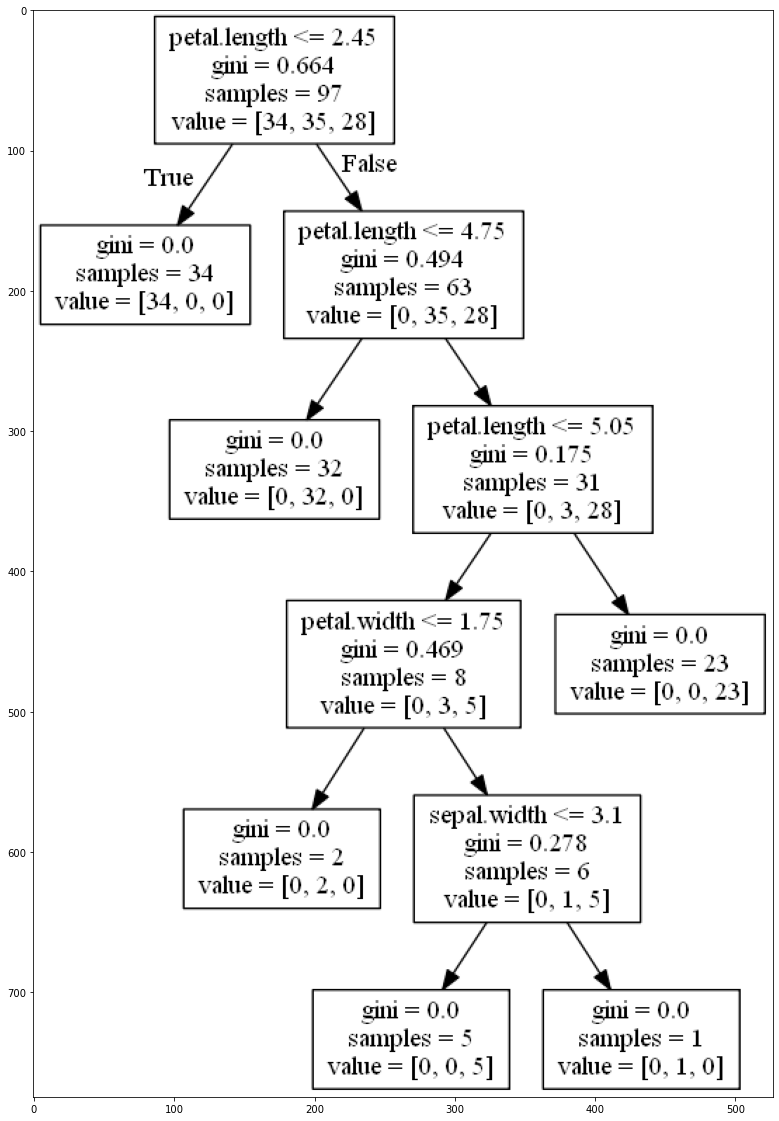

In [8]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)

menampung prediksi pada hasil matatematika dari x test

In [9]:
predictedTree = model.predict(X_test)

mengukur keakuratan dari predictedtree

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test, predictedTree)

menampilkan classification report

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictedTree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.88      0.93      0.90        15
           2       0.95      0.91      0.93        22

    accuracy                           0.94        53
   macro avg       0.94      0.95      0.94        53
weighted avg       0.94      0.94      0.94        53

